# Introduction

In this practice project, I will apply my skills in data extraction and processing by working with APIs and web scraping to gather and process GDP data.

Using tools like web scraping, the Requests API, and libraries such as Pandas and NumPy, I will extract the necessary GDP information -sourced from the International Monetary Fund (IMF)- and process it to display each country's GDP in billions of USD.

# Code

In [1]:
# setup
#Install required packages
#!pip install pandas numpy 
#!pip install lxml
#!pip install matplotlib

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# extracting data
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"
tables = pd.read_html(URL)

# choosing table as dataframe
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retain the Rows with index 1 to 20, indicating the top 20 economies of the world.
df = df.iloc[1:21,:]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']
df

,Country,GDP (Million USD)
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882
6,United Kingdom,3158938
7,France,2923489
8,Italy,2169745
9,Canada,2089672
10,Brazil,2081235


In [4]:
# Change the data type of the 'GDP (Million USD)' column to integer.
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

to_plot = df.copy()

#Change from million USD to billion USD and format to currency
def format(x):
    return "${:.1f}B".format(x/1000)

df['GDP (Million USD)']=df['GDP (Million USD)'].apply(format)

# Change column names
df.columns = ['Country','GDP (Billion USD)']

# Rounding to 2 decimal places
df[['GDP (Billion USD)']] = np.round(df[['GDP (Billion USD)']],2)

df

,Country,GDP (Billion USD)
1,United States,$26854.6B
2,China,$19373.6B
3,Japan,$4409.7B
4,Germany,$4308.9B
5,India,$3736.9B
6,United Kingdom,$3158.9B
7,France,$2923.5B
8,Italy,$2169.7B
9,Canada,$2089.7B
10,Brazil,$2081.2B


In [5]:
# loading to csv
df.to_csv('./Largest_economies.csv')

In [6]:
#preparing bar chart with largest economies
countries = to_plot['Country']

to_plot['GDP (Million USD)'] = to_plot[['GDP (Million USD)']]/1000
to_plot.columns = ['Country','GDP (Billion USD)']
GDP = to_plot['GDP (Billion USD)']

Text(0.5, 1.0, 'GDP (Billion USD) for 20 top economies of the world')

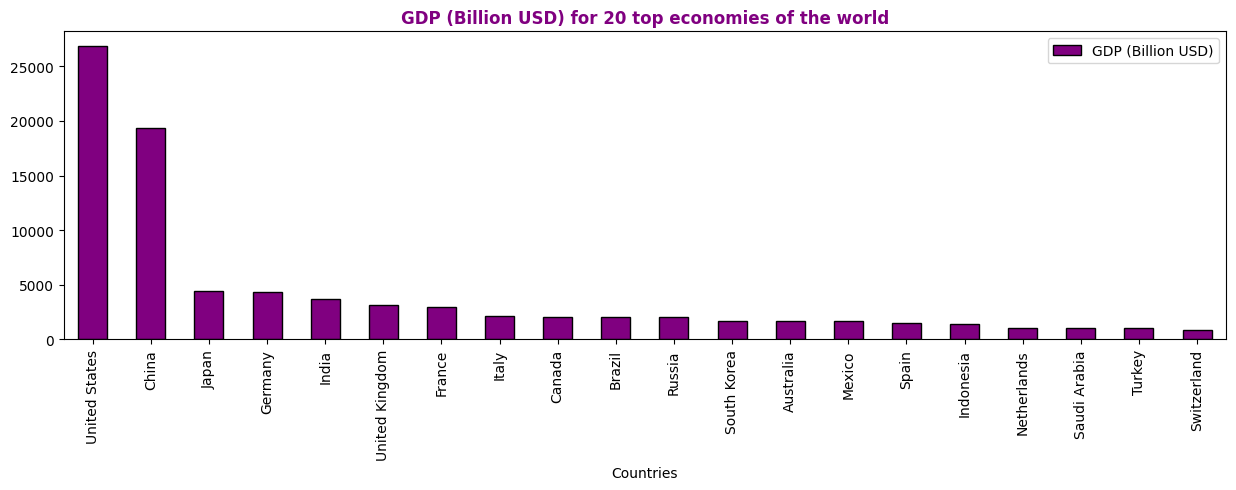

In [8]:
#create a DataFrame
to_plot2 = pd.DataFrame({
    'Countries':countries,
    'GDP (Billion USD)':GDP
    })

#bar chart
ax = to_plot2.plot.bar(x='Countries',y='GDP (Billion USD)',figsize=(15, 4),color = 'purple',edgecolor='black')
ax.set_title('GDP (Billion USD) for 20 top economies of the world', color='purple',fontweight='bold')